- Let's do Exploratory data analysis on the [Titanic Dataset](https://www.kaggle.com/c/titanic/data) !
- We'll use pandas , seaborn and matplotlib libraries of Python. 
- One way to bring the dataset here is to download from kaggle and upload here. Another way is to directly download in colab using an API token. [(reference)](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)

In [ ]:
## Kaggle data to colab: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
''' directly downloading from Kaggle using API. Remember to create kaggle.json file from you kaggle account. '''
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c titanic # this API token was collected from the dataset website

train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

- 11 features, need to predict whether the person 'Survived' or not.

In [ ]:
# Let's load the train dataframe...
train = pd.read_csv('/content/train.csv')
train.head() # returns the first five rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.head(10) # we can also define how many rows to show in head func.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.shape

(891, 12)

Can use *info* nad *describe* functions for detailed statistics/information of the data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# number of Null values per column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

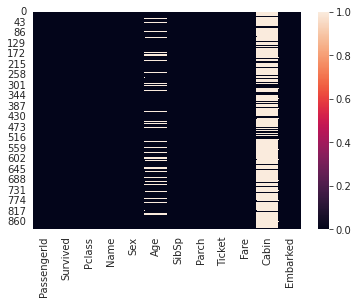

In [ ]:
## Let's visualize the null values (need to get rid of them!)
sns.heatmap(train.isnull())

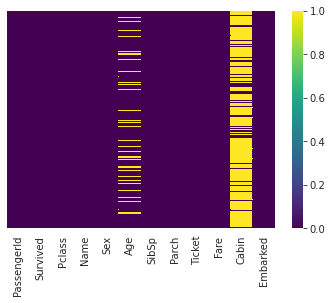

In [ ]:
# this heatmap function offers some additional features (cmap)
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis' )

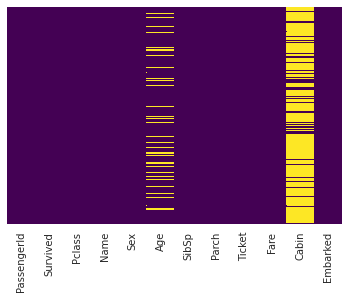

In [ ]:
# can get rid of the color-bar if needed
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis' )

- To conclude, we see that, for most of the dataframes, the Cabin info isn't present. Also for the Age column, a good amount data is absent
- Let's remove the Cabin column and fill the missing values of the Age column

In [ ]:
# Drop Cabin column
train.drop('Cabin',axis=1, inplace = True) 
train.head()
# axis = 1 represents columns. Learn more: https://www.w3resource.com/pandas/dataframe/dataframe-drop.php
# The 'inplace' parameter modifies the actual memory instead of returning a copy. Learn more: https://www.ritchieng.com/pandas-inplace-parameter/

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


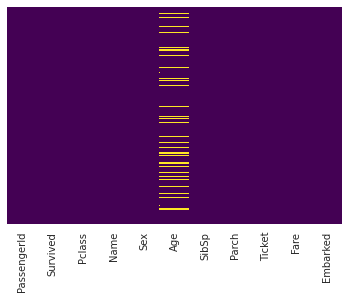

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis' ) # status after dropping the cabin column

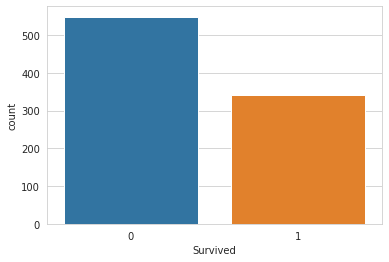

In [ ]:
sns.countplot(x='Survived', data=train)

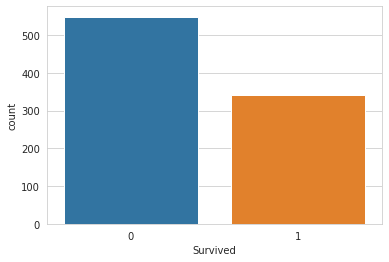

In [ ]:
# we can also add some styles to the graph...
sns.set_style('whitegrid')  # reference: https://seaborn.pydata.org/generated/seaborn.set_style.html
sns.countplot(x='Survived', data=train)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


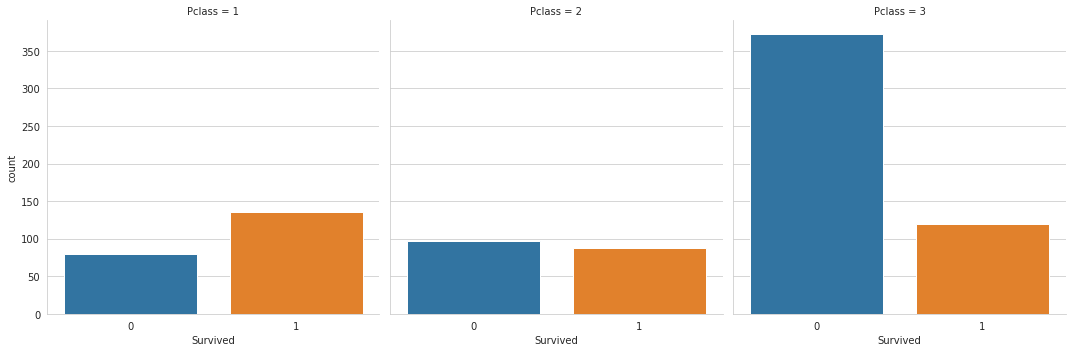

In [ ]:
# let's observe the relation of survived variable other variable
sns.factorplot(x='Survived', col='Pclass', kind='count', data= train) # column names are case sensitive
# females were given priority while saving pessengers. Thus more female survived than male passengers

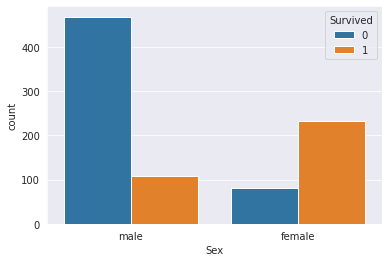

In [ ]:
# there are many other styles.. explore!
sns.set_style('darkgrid')
sns.countplot(x='Sex',hue='Survived', data=train)

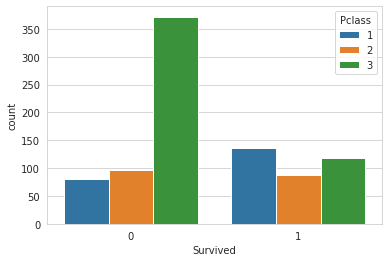

In [ ]:
sns.set_style('whitegrid') 
sns.countplot(x='Survived',hue='Pclass',data=train) 
# Passengers of class-3 has died the most :( )
# Learn more about counterplots: https://seaborn.pydata.org/generated/seaborn.countplot.html

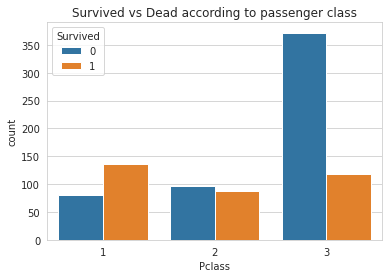

In [ ]:
## survival vs dead per Pclass
sns.set_style('whitegrid') 
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survived vs Dead according to passenger class')
plt.show()

In [ ]:
# these type of operations can be useful.
train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [ ]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
## check out the crosstab function!
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
# let's change the view by a little bit? which one looks better?  well it matters on the context!
pd.crosstab([train.Sex,train.Pclass],train.Survived,margins=True).style.background_gradient(cmap='summer_r')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


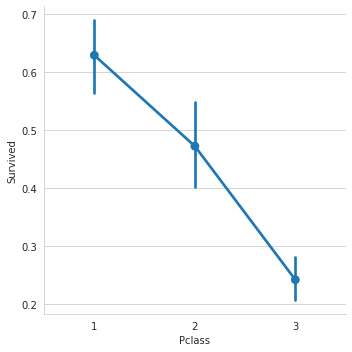

In [ ]:
sns.factorplot('Pclass', 'Survived', data= train)
plt.show()

# passengers of class-3 survived the least! (Money.....)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


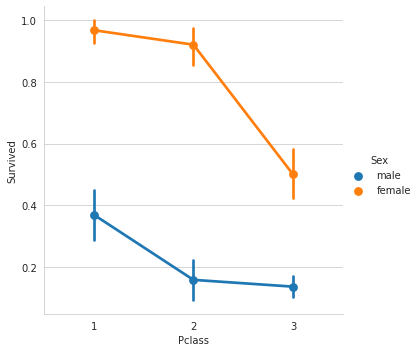

In [ ]:
# how does it vary with gender??
sns.factorplot('Pclass', 'Survived', hue='Sex', data= train)
plt.show()

- From the FactorPlot and CrossTab categorical variables can easily be visualized. 
- Looking at the two plots, it is clear that women survival rate in Class 1 is about 95-96%, as only 3 out of 94 women died. So, it is now more clear that irrespective of Class, women are given first priority during Rescue. 
- Because survival rate for men in even Class 1 is also very low. From this conclusion, PClass is also a important feature.

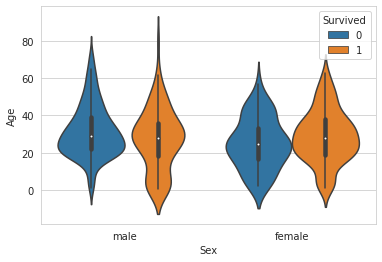

In [ ]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train)

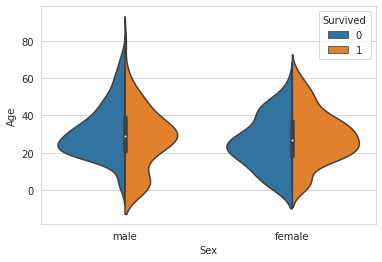

In [ ]:
# the split variable is handy!
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, split=True)

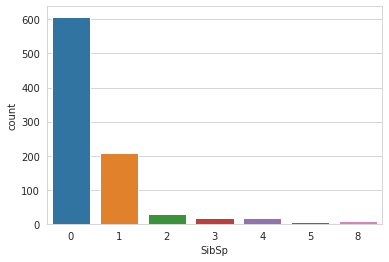

In [ ]:
# let's observe SibSp column (SibSp = Sibling or spouse)
sns.countplot(x='SibSp', data= train)

# seems like most of the passengers travelled alone... typical western culture

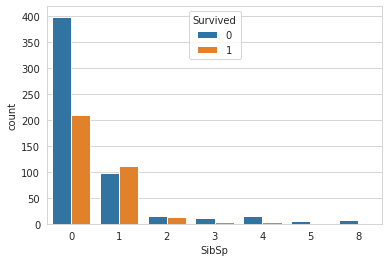

In [ ]:
sns.countplot(x='SibSp', hue = 'Survived', data= train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


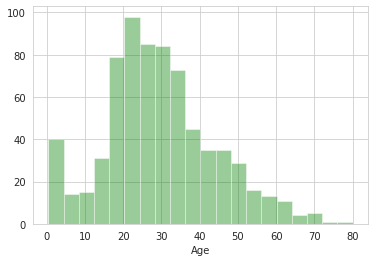

In [ ]:
sns.distplot(train['Age'].dropna(), kde=False, color='green') #kde= False. helps to read the count

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


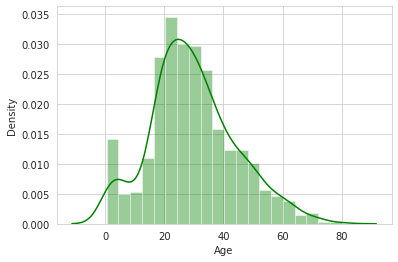

In [ ]:
sns.distplot(train['Age'].dropna(), kde=True, color='green')

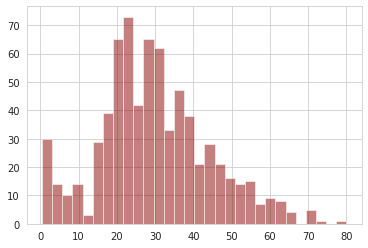

In [ ]:
# the distplot function is similar to the histogram function on matplotlib...
train['Age'].hist(bins=30,color = 'darkred', alpha=0.5)

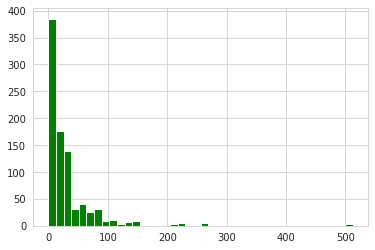

In [ ]:
train['Fare'].hist(bins=40, color='green')

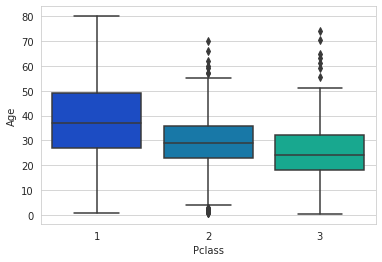

In [ ]:
## It is observed that there is a relation with Pclass and Age column.
sns.boxplot(x='Pclass',y='Age', data=train, palette='winter')
# we can find the average age for each Pclass. So in case of missing data, it can be replace with the avg.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Dealing with categorical values. Need to convert them into numbers
Embarked = pd.get_dummies(train['Embarked'], drop_first=True) # 0 0 combination of Q-S column means C. Thus one feature is reduced.
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
gender = pd.get_dummies(train['Sex'], drop_first=True) # if male=0 it means female. Avoided one column by drop_first= True
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
# Name, Ticket is not relevant to predint Survival. 
# Also, as we created dummies for gender and Embarked, we have to 'drop' the original column from the dataframe and concat them.
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True) 
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
train=pd.concat([train,gender,Embarked],axis=1)
train.head()
# After dealing with missing values, replacing categorical values, Now the dataset is ready to pass into a model for prediction

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


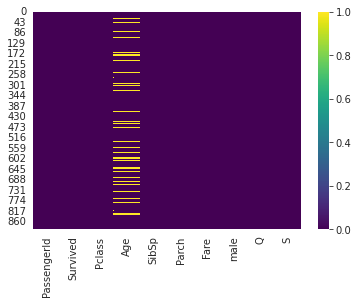

In [ ]:
sns.heatmap(train.isnull(), cmap='viridis')

In [ ]:
# lets fix the missing values of 'Age' feature. 
# policy, we'll replace it by the avg values of the corresponding pclass
# credit: https://github.com/mohantyaditya/Exploratory-Data-Analysis-Titanic/blob/master/TitanicEda.ipynb
def fix_missing_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

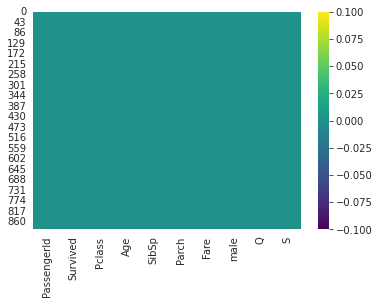

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(fix_missing_age, axis=1)
sns.heatmap(train.isnull(), cmap='viridis')

In [ ]:
# let's check the current status. (remember in the beginning there were lot's of missing values!)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


## Building a Logistic Regression Model


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
# Need to drop the survived column since it's the class Label.
train.drop('Survived', axis=1).head()  ## change is not happening in original place

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [ ]:
train['Survived'].head() ## change is not happening in original place

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), 
                                                    train['Survived'],
                                                    test_size=0.3,
                                                    random_state=101)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(623, 9)
(623,)
(268, 9)
(268,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(x_test)

In [ ]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7686567164179104


In [ ]:
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[134,  20],
       [ 42,  72]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



- Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

- This was all for today. Although we filled the missing values of Age column, there are opportunities to do lot more 'feature engineering'  to find inner meanings.

- There are lots of Notebooks in Kaggle website where you can find even deeper 'data analysis' on this dataset. Please explore!
- Few of them are: [notebook by MANAV SEHGAL](https://www.kaggle.com/startupsci/titanic-data-science-solutions), [notebook by ASHWINI SWAIN](https://www.kaggle.com/ash316/eda-to-prediction-dietanic/notebook). (Find similar resources in the [here](https://www.kaggle.com/c/titanic/code), go to the 'code' tab, sort based on 'most votes'/'hotness'/there are other options...)

## ***Some suggestions***:
- Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
- Maybe the Cabin letter could be a feature
- Is there any info you can get from the ticket?

**Resources**:
- [EDA on Titanic Dataset - Medium](https://medium.datadriveninvestor.com/step-by-step-exploratory-data-analysis-of-titanic-dataset-2d0fb09b0e86)
-[EDA on Titanic Dataset - Jamil Moughal](https://www.kaggle.com/mjamilmoughal/eda-of-titanic-dataset-with-python-analysis)
-[EDA + Logistic Regression on Titanic](https://github.com/krishnaik06/EDA1/blob/master/EDA.ipynb)